In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 3]

# Exercise 1 {-}

In exercise 1 principal component analysis (PCA) will be used on three different datasets to determine the principal components of each dataset as the eigenvectors of the covariance matrix for each dataset. The variances captured by the principal components are the eigenvalues of the covariance matrix. The principal components (PCs) are sorted in decreasing order of the corresponding variance. 

First the PCA function is defined. 

In [2]:
#define PCA function
def pca(A):
    #center data
    for i in range(np.shape(A)[1]):
        A[:,i] -= np.mean(A[:,i])
    #compute covariance matrix
    Sigma = np.cov(A.T)
    #compute eigenvalues and eigenvectors for covariance matrix
    evals, evecs = np.linalg.eigh(Sigma)
    # switch eigenvalue (and corresponding eigenvector) ordering
    evals = evals[::-1]
    evecs = evecs[:,::-1]
    
    return evals, evecs   

The PCA function is then run on the 'murder' dataset to compute the principal eigenvectors. A scatterplot of the dataset, the mean and the two eigenvectors pointing out of the mean is produced. Each of the two eigenvectors has length scaled by the standard deviation of the dataset projected onto that principal component (eigenvector). 

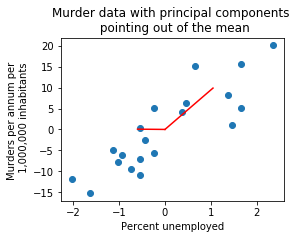

In [3]:
#import and perform PCA on the murder data 
murder = np.loadtxt('murderdata2d.txt')
evals, evecs = pca(murder)

#compute the corresponding standard deviations
s0 = np.sqrt(evals[0])
s1 = np.sqrt(evals[1])

#plot scatter plot, mean and principal eigenvectors scaled by the standard deviation
plt.figure()
plt.scatter(murder[:,0],murder[:,1])
plt.plot([0, s0*evecs[0,0]], [0, s0*evecs[1,0]], 'r')
plt.plot([0, s1*evecs[0,1]], [0, s1*evecs[1,1]], 'r')
plt.xlabel('Percent unemployed')
plt.ylabel('Murders per annum per \n 1,000,000 inhabitants')
plt.title('Murder data with principal components \n pointing out of the mean')
plt.show()

Next, PCA is performed on the 'pesticide' dataset and a plot of variance vs. principal component (PC) index is produced. 

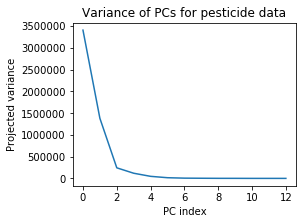

In [4]:
#import and perform PCA on the pesticide data
pest = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
XPest = pest[:,:-1]
evals, evecs = pca(XPest)

#plot the projected variance on each principal component
plt.figure()
plt.plot(evals)
plt.xlabel('PC index')
plt.ylabel('Projected variance')
plt.title('Variance of PCs for pesticide data')
plt.show()

Next, PCA is performed on the 'Occupancy' dataset and a plot of variance vs. PC index is produced.

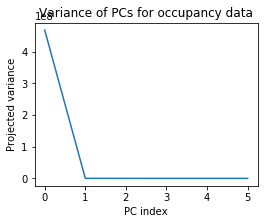

In [5]:
#import and perform PCA on un-normalised occupancy data
occupancy = np.loadtxt('occupancy_data.csv', delimiter=',')
XOccupancy = occupancy[:,:-1]
YPccupancy = occupancy[:,-1]
evals, evecs = pca(XOccupancy)

#plot the projected variance on each principal component
plt.figure()
plt.plot(evals)
plt.xlabel('PC index')
plt.ylabel('Projected variance')
plt.title('Variance of PCs for occupancy data')
plt.show()

Next, the 'Occupancy' dataset is standardised to standard deviation 1 and PCA is performed on the standardised data. A plot of variance vs. PC index is produced. 

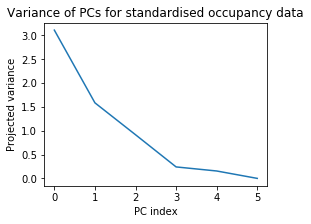

In [6]:
#standardise the occupancy data
for i in range(len(XOccupancy.T)):
    XOccupancy[:,i] /= np.std(XOccupancy[:,i])
    
#perform PCA on standardised occupancy data
evals, evecs = pca(XOccupancy)

#plot the projected variance on each principal component
plt.figure()
plt.plot(evals)
plt.xlabel('PC index')
plt.ylabel('Projected variance')
plt.title('Variance of PCs for standardised occupancy data')
plt.show()

Next, the cumulative variance of the standardised 'Occupancy' data is plotted vs. the number of principal components considered. 

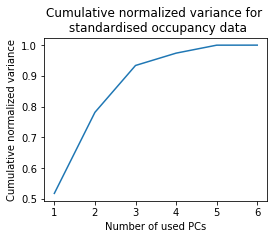

In [7]:
#compute and plot cumulative normalised variance
c_var = np.cumsum(evals/np.sum(evals))
used_PCs = np.linspace(1,6,6)

plt.figure()
plt.plot(used_PCs, c_var)
plt.xlabel('Number of used PCs')
plt.ylabel('Cumulative normalized variance')
plt.title('Cumulative normalized variance for \n standardised occupancy data')
plt.show()

In [8]:
#number of PCs needed to capture 90% and 95% of the variance
c_var

array([0.51751841, 0.7813107 , 0.93379476, 0.97393729, 0.999882  ,
       1.        ])

I see that three PCs (dimensions) describe 90 % of the variance, and four PCs describe 95 % of the variance.

# Exercise 2 {-}

In exercise 2 multidimensional scaling (MDS) is used on two different datasets to reduce dimensionality to 2D for better visualization of the data. MDS reduces dimensionality of the data to 2D by projecting the data onto the two first principal components (two principal components with largest variance). 

First the MDS function is defined. 

In [9]:
#define MDS function to project data onto first 2 principal components
def mds(A):
    #perform pca on dataset to obtain principal components 
    evals, evecs = pca(A)
    pc1 = evecs[:,0]
    pc2 = evecs[:,1]
    
    #project data onto PC1
    proj1 = A@pc1
    #project data onto PC2
    proj2 = A@pc2
    
    return proj1, proj2

Then, MDS is performed on the 'pesticide' dataset and a scatterplot of the 2D data is produced. 

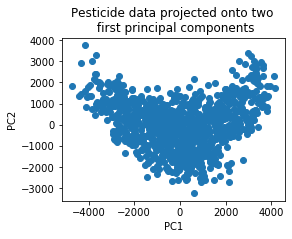

In [10]:
#perform MDS on the pesticide data
pest = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
XPest = pest[:,:-1]
proj1, proj2 = mds(XPest)

plt.figure()
plt.scatter(proj1,proj2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pesticide data projected onto two \n first principal components')
plt.show()

Next, MDS is performed on the 'Occupancy' dataset and  a scatterplot of the 2D data is produced. 

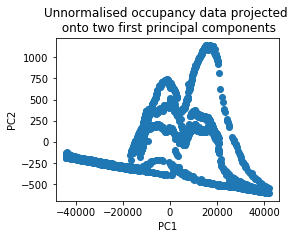

In [11]:
#perform MDS on the unnormalised occupancy data
occupancy = np.loadtxt('occupancy_data.csv', delimiter=',')
XOccupancy = occupancy[:,:-1]
proj1, proj2 = mds(XOccupancy)

plt.figure()
plt.scatter(proj1,proj2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Unnormalised occupancy data projected \n onto two first principal components')
plt.show()

Lastly, the 'Occupancy' dataset is once again standardised and MDS is performed on the standardised data. A scatterplot of the 2D data is produced. 

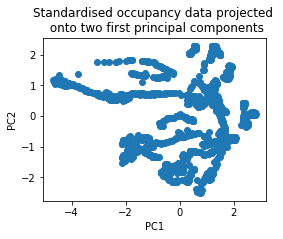

In [12]:
#standardise the occupancy data
for i in range(len(XOccupancy.T)):
    XOccupancy[:,i] /= np.std(XOccupancy[:,i])

#perform MDS on the standardised occupancy data
proj1, proj2 = mds(XOccupancy)

plt.figure()
plt.scatter(proj1,proj2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Standardised occupancy data projected \n onto two first principal components')
plt.show()


# Exercise 3 {-}

In exercise 3 clustering is performed on the 'pesticide' dataset using k-means clustering. The number of clusters is set to 2 so more specifically 2-means clustering is used. For initial cluster centers the first two data points in the 'pesticide' dataset are used. 

The 2-means clustering is implemented below (by myself). First the two initial cluster centers are defined. Next the distances from each data point to each of the two cluster centers are computed and each datapoint is assigned to the closest cluster center. The new cluster center for each of the two clusters is then defined as the mean of the points belonging to that cluster. With new cluster centers defined the algorithm is repeated until the cluster centers no longer change. 

In [13]:
#load the pesticide training data
dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
XTrain = dataTrain[:,:-1]

#define initial cluster centers
cen1 = XTrain[0]
cen2 = XTrain[1]

#repeat the 2-means clustering until cluster centers are unchanged
rounds = []
for n in range(50):
    clust1 = []
    clust2 = []
    oldcen1 = cen1
    oldcen2 = cen2
    #assign each data point to a cluster
    for i in range(len(XTrain)):
        #distance between data point and cluster center 1
        dist1 = np.sqrt(sum((XTrain[i][m]-cen1[m])**2 for m in range(len(XTrain[0]))))
        #distance between data point and cluster center 2
        dist2 = np.sqrt(sum((XTrain[i][m]-cen2[m])**2 for m in range(len(XTrain[0]))))
        if dist1 < dist2:
            clust1.append(XTrain[i])
        else:
            clust2.append(XTrain[i])

    cen1 = np.array([np.mean(np.array(clust1)[:,i]) for i in range(len(clust1[0]))])
    cen2 = np.array([np.mean(np.array(clust2)[:,i]) for i in range(len(clust1[0]))])
    
    #append a 1 to the list 'rounds' for each round to account for the number of iterations needed before the cluster centers remain unchanged
    rounds.append(1)
    
    if np.array_equal([cen1,cen2], [oldcen1,oldcen2]) == True:
        break
    
print('The first cluster center is at ' + str(cen1))
print('The second cluster center is at ' + str(cen2))
print('The 2-means clustering converged after ' + str(len(rounds))+' iterations.')
    

The first cluster center is at [5.70726496e+00 4.93012821e+01 7.92408120e+02 3.85595940e+03
 3.38821368e+03 1.35652778e+03 2.91737179e+02 1.29989316e+02
 6.86111111e+01 3.81880342e+01 1.87692308e+01 4.13461538e+00
 4.42307692e-01]
The second cluster center is at [2.19924812e+00 1.40018797e+01 1.73727444e+02 1.40094549e+03
 3.18759962e+03 2.62043985e+03 1.00147368e+03 6.31413534e+02
 4.95295113e+02 2.95238722e+02 1.45689850e+02 2.91466165e+01
 2.82330827e+00]
The 2-means clustering converged after 30 iterations.


# Exercise 4 {-}

In exercise 4 a few questions on Bayesian statistics are answered. The questions are written in bold text and the answers in normal text. 

\textbf{1. How is probability interpreted differently in the frequentist and Bayesian views?} 
The frequentist view sees the probability of an event occuring as the frequency of observing that event when performing a large number of trials. This is in contrast to the Bayesian view which interprets probability as a degree of belief or a measure of certainty. 

\textbf{2. Cheap, efficient computers played a major role in making Bayesian methods mainstream.  Why?} 
Bayesian models can often be analytically unmanageable and therefore the use of Bayesian models rely on simulations. As computers evolved to being fast at performing simulations while accessible at an affordable price, Bayesian methods became mainstream. 

\textbf{3. What is the difference between a Bayesian credible interval and a frequentist confidence interval?} 
For a Bayesian credible interval of e.g. 95 \% the probability that a given parameter is lying in that interval is 95 \%. For a frequentist confidence interval of e.g. 95 \% , 95 \% of intervals will contain the true value of a given parameter when a large number of identical experiments are performed. 

\textbf{4. How does a maximum likelihood estimate approximate full Bayesian inference?} 
The expression for full Bayesian inference is "posterior = (likelihood x prior)/evidence". As the evidence is constant, it can often be ignored and the expression for full Bayesian inference is "posterior $\propto$ (likelihood x prior)". A maximum likelihood estimate assumes that the prior is also a constant so the term (prior/evidence) is a constant and the final expression for Bayesian inference is "posterior $\propto$ likelihood". 

\textbf{5. When will point estimates be a good approximation of full Bayesian inference?} 
Since point estimates (such as a maximum likeluhood estimate) assume that the prior distribution is constant, point estimates will be a good approximation of full Bayesian inference in cases where the prior distribution is uniform or close to uniform. 
   